# 01 - Image Basics with OpenCV

In [2]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

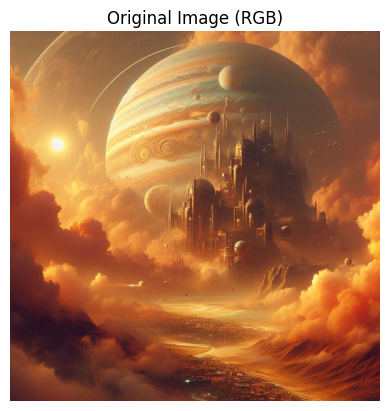

In [4]:
# Load image in color (BGR format)
img = cv2.imread("civilization.png")

# Show using Matplotlib (convert BGR → RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()


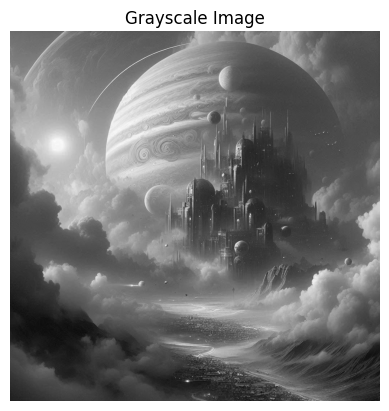

True

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Optional: Save grayscale version
cv2.imwrite("gray_image.jpg", gray)

In [6]:
print("Shape:", img.shape)      # H x W x C
print("Data type:", img.dtype)
print("Pixel at [100, 100] (BGR):", img[100, 100])

Shape: (1024, 1024, 3)
Data type: uint8
Pixel at [100, 100] (BGR): [ 79 133 188]


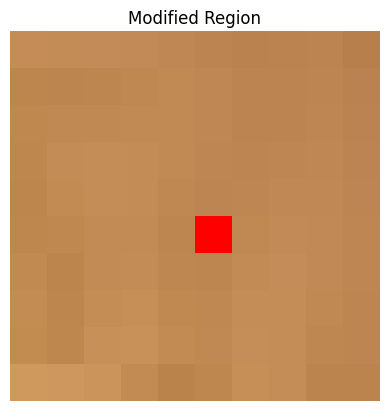

In [7]:
# Set pixel to red at [100, 100]
img[100, 100] = [0, 0, 255]

# Zoomed crop to verify
crop = img[95:105, 95:105]
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.title("Modified Region")
plt.axis("off")
plt.show()


# Expanded Image Basics (OpenCV + NumPy)

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Load & Inspect the Image

Image shape: (1024, 1024, 3)
Pixel type: uint8
Min/Max pixel values: 0 255


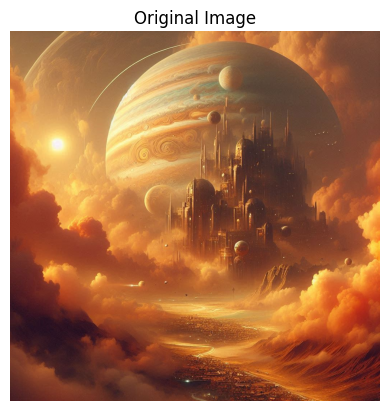

In [11]:
img = cv2.imread("civilization.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image shape:", img.shape)      # (H, W, 3)
print("Pixel type:", img.dtype)
print("Min/Max pixel values:", img.min(), img.max())

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


2. Split and Visualize Color Channels

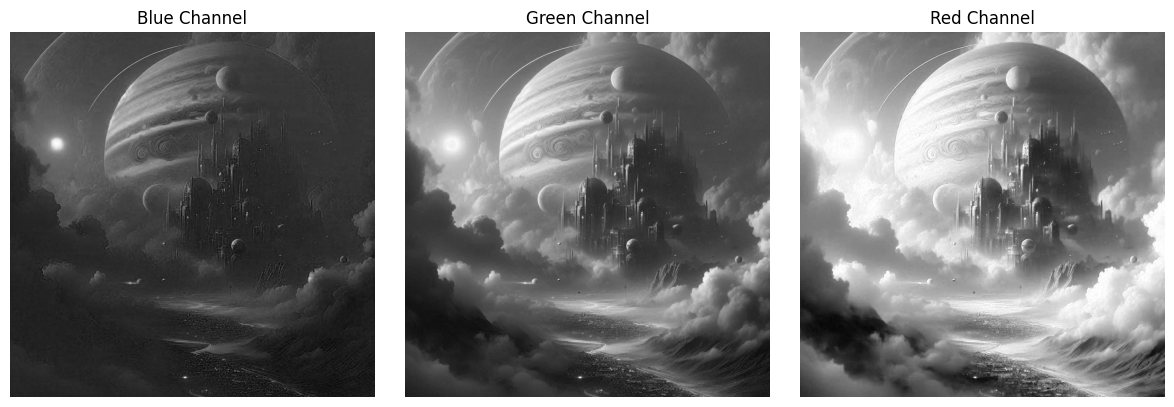

In [12]:
b, g, r = cv2.split(img)

plt.figure(figsize=(12, 4))
for i, (channel, title) in enumerate(zip([b, g, r], ["Blue", "Green", "Red"])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel, cmap='gray')
    plt.title(f"{title} Channel")
    plt.axis("off")
plt.tight_layout()
plt.show()

3. Draw Shapes and Text

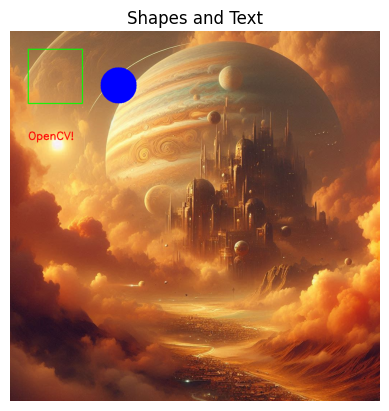

In [13]:
img_copy = img.copy()

# Draw a rectangle
cv2.rectangle(img_copy, (50, 50), (200, 200), (0, 255, 0), 2)

# Draw a circle
cv2.circle(img_copy, (300, 150), 50, (255, 0, 0), -1)  # Filled

# Add text
cv2.putText(img_copy, "OpenCV!", (50, 300), cv2.FONT_HERSHEY_SIMPLEX,
            1, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.title("Shapes and Text")
plt.axis("off")
plt.show()


4. Region of Interest (ROI) + Copying

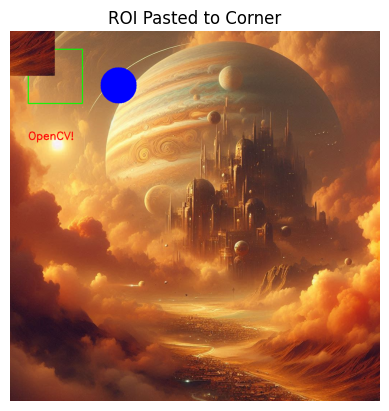

In [17]:
roi = img[900:1024, 900:1024]  # Crop a square region

# Paste it elsewhere
img_copy[0:124, 0:124] = roi

plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.title("ROI Pasted to Corner")
plt.axis("off")
plt.show()


5. Bitwise Operations (Masking)

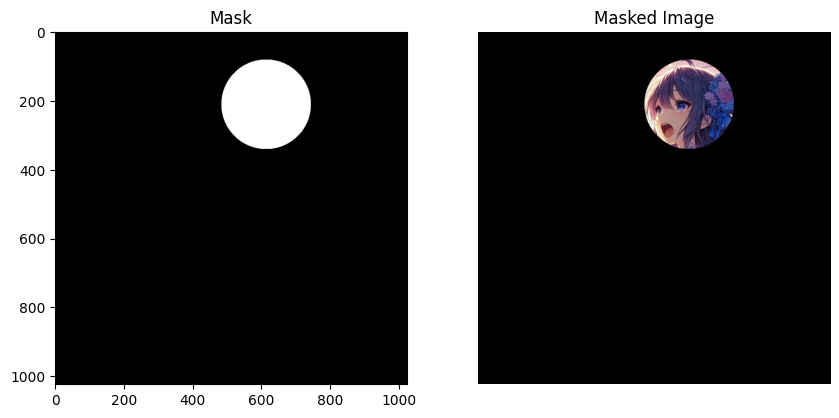

In [29]:
# Create a mask (white circle on black background)
img = cv2.imread("singing.png")
mask = np.zeros(img.shape[:2], dtype="uint8")
offset = (300,100)
cv2.circle(mask, (img.shape[1]//2+offset[1], img.shape[0]//2-offset[0]), 130, 255, -1)

# Apply mask
masked = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Mask")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.title("Masked Image")
plt.axis("off")
plt.show()


 6. Image Copy vs View (important for memory)

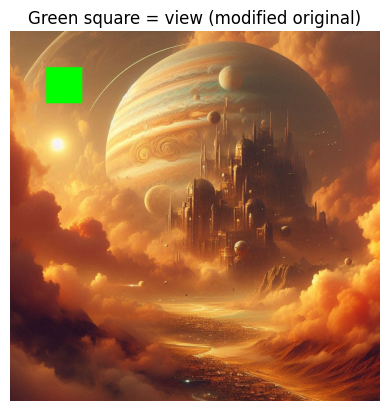

In [35]:
img = cv2.imread("civilization.png")
img_view = img[100:200, 100:200]    # This is a **view**
img_copy = img[100:200, 100:200].copy()  # This is a **copy**

img_view[:] = (0, 255, 0)  # Will affect original!
img_copy[:] = (0, 0, 255)  # Won't affect original

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Green square = view (modified original)")
plt.axis("off")
plt.show()


# Exercises

### 1. Image Explorer
- Load an image (.jpg, .png) of your choice.

- Print:

    - Dimensions (height, width, channels)

    - Pixel at coordinates (150, 200)

    - Total number of pixels

Save the grayscale version as "yourimage_gray.png"

In [39]:
import cv2
image = cv2.imread("singing.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(f"Image shape: {image.shape}")
print(f"Pixels at (150,200): {image[150,200]}")
print(f"Total number of pixels: {image.shape[0]*image.shape[1]}")
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cv2.imwrite("singing_gray.png", image_gray)

Image shape: (1024, 1024, 3)
Pixels at (150,200): [42 55 97]
Total number of pixels: 1048576


True